## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from tensorflow.keras import Sequential

## Image Preprocessing (Image Augmentation)

### Training set

In [2]:
train_img_aug = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
training_set = train_img_aug.flow_from_directory(
    directory = '../../../Datasets/gender_classification/Training',
    target_size = (64, 64),
    batch_size = 100,
    class_mode = 'binary'
)

Found 47002 images belonging to 2 classes.


### Validation set

In [4]:
val_img_aug = ImageDataGenerator(
    rescale = 1./255
)

In [5]:
val_set = val_img_aug.flow_from_directory(
    directory = '../../../Datasets/gender_classification/Validation',
    target_size = (64, 64),
    batch_size =100,
    class_mode = 'binary'
)

Found 11649 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'female': 0, 'male': 1}

## CNN Model

In [7]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), input_shape = (64, 64, 3), activation = 'relu', 
                 padding = 'valid'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'valid'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))

model.add(Dense(units = 128, activation = 'relu'))

model.add(Dropout(rate = 0.5))

model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))


### Compile the model

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

### Train the model

In [10]:
model.fit(x = training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
471/471 [==============================] - 234s 495ms/step - loss: 0.5510 - accuracy: 0.7116 - val_loss: 0.2878 - val_accuracy: 0.8843
Epoch 2/10
471/471 [==============================] - 227s 482ms/step - loss: 0.3296 - accuracy: 0.8633 - val_loss: 0.1849 - val_accuracy: 0.9307
Epoch 3/10
471/471 [==============================] - 229s 487ms/step - loss: 0.2530 - accuracy: 0.8996 - val_loss: 0.1634 - val_accuracy: 0.9364
Epoch 4/10
471/471 [==============================] - 230s 487ms/step - loss: 0.2231 - accuracy: 0.9130 - val_loss: 0.1514 - val_accuracy: 0.9463
Epoch 5/10
471/471 [==============================] - 229s 485ms/step - loss: 0.2050 - accuracy: 0.9218 - val_loss: 0.1498 - val_accuracy: 0.9434
Epoch 6/10
471/471 [==============================] - 229s 485ms/step - loss: 0.1995 - accuracy: 0.9245 - val_loss: 0.1526 - val_accuracy: 0.9426
Epoch 7/10
471/471 [==============================] - 230s 488ms/step - loss: 0.2061 - accuracy: 0.9217 - val_loss: 0.1370 -

### Save the model

In [12]:
model.save('gender_detector.keras')

## Predictions

In [100]:
from urllib.request import urlretrieve
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array


In [120]:
def predict_gender(img_path):
    '''
    This function takes an image path, and detect the gender of the given image.
    NOTE : The image should only contain the face for better prediction. If not, transform the image accordingly.

    PARAMETERS 
    -----------
    img_path (str) : relative or absolute path of the image

    RETURN
    -------
    Returns None
    '''
    
    img = load_img(img_path, target_size = (64, 64, 3))
    img_array = img_to_array(img)
    img_array = img_array / 255.
    img_array = img_array.reshape(1, 64, 64, 3)

    prediction = model.predict(img_array, verbose = 0)

    if prediction[0][0] > 0.5:
        print(f"Predicted as a MALE with probability :{prediction[0][0] : .3f}")
    else:
        print(f"Predicted as a FEMALE with probability :{1 - prediction[0][0] : .3f}")

In [121]:
print(predict_gender.__doc__)


    This function takes an image path, and detect the gender of the given image.
    NOTE : The image should only contain the face for better prediction. If not, transform the image accordingly.

    PARAMETERS 
    -----------
    img_path (str) : relative or absolute path of the image

    RETURN
    -------
    Returns None
    


#### Male (Cristiano Ronaldo)

In [123]:
urlretrieve("https://i.pinimg.com/564x/c3/59/fa/c359fa0809bf5044c93192f4caada02c.jpg", "cr7.jpg")

('cr7.jpg', <http.client.HTTPMessage at 0x2c4b7a87b50>)

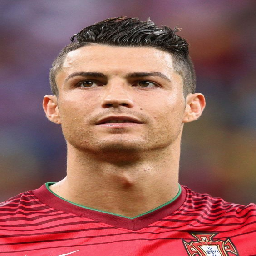

In [124]:
cr7 = load_img('./test/cr7.jpg', target_size = (256, 256))
cr7

In [125]:
predict_gender('./test/cr7.jpg')

Predicted as a MALE with probability : 0.841


#### Male (Me 🥲)

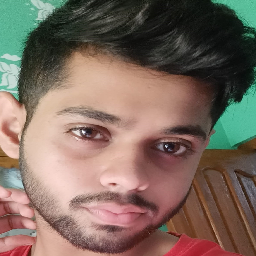

In [126]:
mainak = load_img('./test/mainak.jpeg', target_size = (256, 256))
mainak

In [127]:
predict_gender('./test/mainak.jpeg')

Predicted as a MALE with probability : 0.911


### `I am grateful to my model as it perfectly recognizes my gender ;)`

#### Male 2

In [128]:
urlretrieve("https://www.clinicdermatech.com/images/men-service-face.jpg", "male1.jpg")

('male1.jpg', <http.client.HTTPMessage at 0x2c4b7bbaed0>)

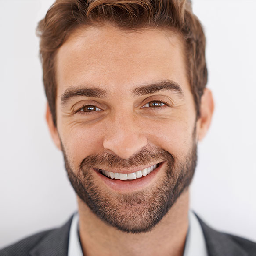

In [129]:
male1 = load_img('./test/male1.jpg', target_size = (256, 256))
male1

In [130]:
predict_gender('./test/male1.jpg')

Predicted as a MALE with probability : 0.997


#### Female

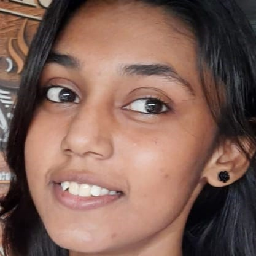

In [131]:
sinchana = load_img('./test/sinchana.jpeg', target_size = (256, 256, 3))
sinchana

In [132]:
predict_gender('./test/sinchana.jpeg')

Predicted as a FEMALE with probability : 0.952


#### Female 2

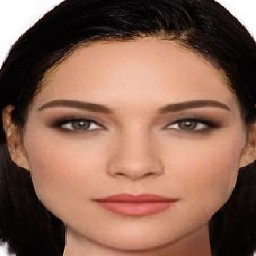

In [133]:
female1 = load_img('./test/female1.jpg', target_size = (256, 256))
female1

In [112]:
predict_gender('./test/female1.jpg')

Predicted as a FEMALE with probability : 0.998


## `NOTE` : **The image should only contain the face part. If not, please transform the picture accordingly ! (See the examples)**